#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

HW1: "MSE"

In [22]:
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])


In [23]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)

Epoch 1/10
293/293 [==============================] - 79s 271ms/step - loss: 0.0901 - accuracy: 0.1101 - val_loss: 0.0899 - val_accuracy: 0.1429
Epoch 2/10
293/293 [==============================] - 81s 275ms/step - loss: 0.0900 - accuracy: 0.1146 - val_loss: 0.0898 - val_accuracy: 0.1426
Epoch 3/10
293/293 [==============================] - 81s 278ms/step - loss: 0.0899 - accuracy: 0.1206 - val_loss: 0.0898 - val_accuracy: 0.1467
Epoch 4/10
293/293 [==============================] - 84s 285ms/step - loss: 0.0898 - accuracy: 0.1259 - val_loss: 0.0897 - val_accuracy: 0.1554
Epoch 5/10
293/293 [==============================] - 83s 282ms/step - loss: 0.0897 - accuracy: 0.1307 - val_loss: 0.0896 - val_accuracy: 0.1643
Epoch 6/10
293/293 [==============================] - 83s 284ms/step - loss: 0.0896 - accuracy: 0.1378 - val_loss: 0.0896 - val_accuracy: 0.1701
Epoch 7/10
293/293 [==============================] - 84s 285ms/step - loss: 0.0895 - accuracy: 0.1409 - val_loss: 0.0895 - val_ac

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

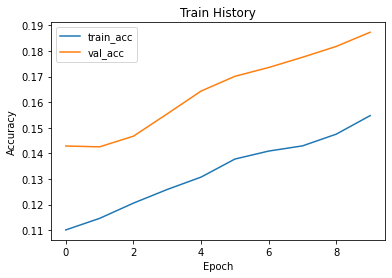

313/313 [==============================] - 5s 18ms/step - loss: 0.0893 - accuracy: 0.1855

accuracy= 0.18549999594688416


In [25]:
show_train_history('accuracy','val_accuracy')
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

HW1: "binary _crossentropy"

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
train2_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)

Epoch 1/10
293/293 [==============================] - 95s 325ms/step - loss: 2.0990 - accuracy: 0.2366 - val_loss: 2.0339 - val_accuracy: 0.3049
Epoch 2/10
293/293 [==============================] - 91s 310ms/step - loss: 1.9185 - accuracy: 0.3135 - val_loss: 1.9080 - val_accuracy: 0.3726
Epoch 3/10
293/293 [==============================] - 86s 292ms/step - loss: 1.8049 - accuracy: 0.3575 - val_loss: 1.8384 - val_accuracy: 0.3879
Epoch 4/10
293/293 [==============================] - 86s 293ms/step - loss: 1.7291 - accuracy: 0.3853 - val_loss: 1.7604 - val_accuracy: 0.4129
Epoch 5/10
293/293 [==============================] - 86s 295ms/step - loss: 1.6618 - accuracy: 0.4075 - val_loss: 1.6913 - val_accuracy: 0.4320
Epoch 6/10
293/293 [==============================] - 86s 293ms/step - loss: 1.5982 - accuracy: 0.4294 - val_loss: 1.6398 - val_accuracy: 0.4510
Epoch 7/10
293/293 [==============================] - 87s 297ms/step - loss: 1.5475 - accuracy: 0.4451 - val_loss: 1.5874 - val_ac

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train2_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

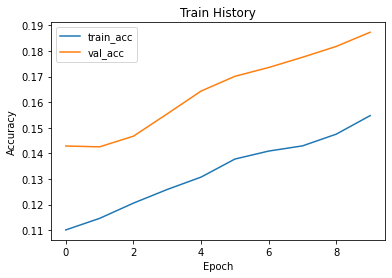

313/313 [==============================] - 5s 15ms/step - loss: 1.4497 - accuracy: 0.5261

accuracy= 0.5260999798774719


In [29]:
show_train2_history('accuracy','val_accuracy')
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])